In [39]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [40]:
#load and read csv file
data_module= pd.read_csv("bike_sharing.csv")
data_module.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
data_module=data_module[['temp','cnt']]
data_module.head()

,temp,cnt
0,0.24,16
1,0.22,40
2,0.22,32
3,0.24,13
4,0.24,1


In [42]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [43]:
data_module.describe()

,temp,cnt
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [44]:
data_module.isnull().sum()

temp    0
cnt     0
dtype: int64

In [45]:
#split dataset into train data an dtest data
train,test= train_test_split(data_module,test_size=0.2,random_state=0)

In [46]:
print("train data:",train.shape)
print("test data:",test.shape)

train data: (13903, 2)
test data: (3476, 2)


In [47]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

In [48]:
train_module= pd.read_csv("train.csv")
train_module.head()

,temp,cnt
0,0.30,157
1,0.30,164
2,0.46,79
3,0.80,845
4,0.56,122


In [49]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [50]:
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,1].values

In [51]:
print("x_train data set",x_train.shape)
print("y_train data set",y_train.shape)

x_train data set (9732, 1)
y_train data set (9732,)


In [52]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [53]:
# fitting simple linear regression to the training dataset
regressor = DecisionTreeRegressor() 
regressor.fit( x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
y_pred_train= regressor.predict(x_train)

In [55]:
y_pred_train

array([ 0.03834063,  0.10869626, -0.12605645, ...,  0.05719993,
       -0.60464988,  0.08027822])

In [56]:
# #train
# train_accuracy= sklearn.metrics.r2_score(y_train,y_pred_train)*100
# train_accuracy
accuracy =sklearn.metrics.mean_squared_error(y_train,y_pred_train)*100
print(accuracy)


82.78307432601912


In [57]:
# file = open("train_data.pkl",'wb')
# pickle.dump(regressor,file)

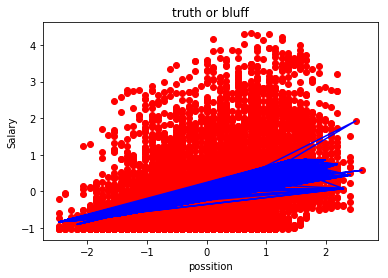

In [58]:
#visualizing the train result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("truth or bluff")
plt.xlabel("possition")
plt.ylabel("Salary")
plt.show()

In [59]:
file = open("train_data.pkl",'wb')
pickle.dump(regressor,file)

In [60]:
file1= open("train_data.pkl",'rb')
regressor1=pickle.load(file1)

In [61]:
cv_data.to_csv("cv_data.csv",index= False)

In [62]:
cv_data_x = cv_data.iloc[:,:-1].values
cv_data_y= cv_data.iloc[:,1].values

In [63]:
print("cross validate data x:",cv_data_x.shape)
print("cross_validate data y:",cv_data_y.shape)

cross validate data x: (4171, 1)
cross_validate data y: (4171,)


In [64]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

In [65]:
y_pred_cv = regressor1.predict(cv_data_x)

In [66]:
y_pred_cv

array([ 0.05930206, -0.2937956 , -0.65364224, ...,  0.46492152,
        0.05719993, -0.16140396])

In [67]:
# #train
# cv_accuracy= sklearn.metrics.r2_score(cv_data_y,y_pred_cv)*100
# cv_accuracy
cv_accuracy =sklearn.metrics.mean_squared_error(cv_data_y,y_pred_cv)*100
print(cv_accuracy)

82.61425040770082


In [68]:
# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 
  
#     # Performing training 
# clf_entropy.fit(x_train, y_train) 

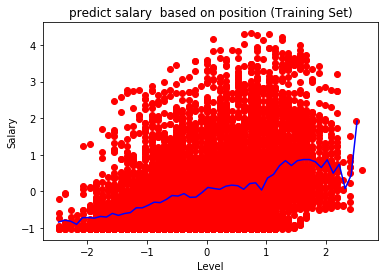

In [69]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict salary  based on position (Training Set)')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

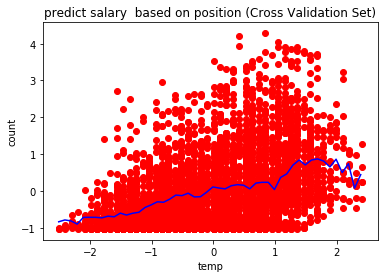

In [71]:
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict salary  based on position (Cross Validation Set)')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()
